##### Customer Churn Analysis - Vinayak Ratan

##### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
customer_churn_df = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\DSData-master\Telecom_customer_churn.csv')
# First 5 rows
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Last 5 rows
customer_churn_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Getting the sahpe of data
customer_churn_df.shape

(7043, 21)

In [6]:
# Looking at the datatypes of data
customer_churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# To display all the columns
pd.set_option('display.max_columns', None)
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Since the total charges must be float data type but it is object data type.
# lets convert it
pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce') 
customer_churn_df[pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce').isnull()].shape

# removing rows in TotalCharges with empty string
customer_churn_df= customer_churn_df[customer_churn_df['TotalCharges']!= ' '] 

In [10]:
# Changing the data type to float
customer_churn_df['TotalCharges'] = customer_churn_df['TotalCharges'].astype(float)

In [11]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [12]:
customer_churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
customer_churn_df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
customer_churn_df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

- Senior citizen column looks encoded already with '0' indicated not a senior citizen and '1' indicating a senior citizen

Male      3549
Female    3483
Name: gender, dtype: int64

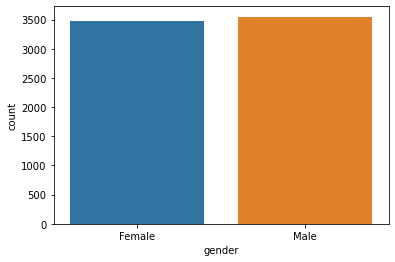

In [15]:
sns.countplot(x = 'gender', data = customer_churn_df)
customer_churn_df['gender'].value_counts()

- Looks like male and female are almost equally distributed in data

No     3639
Yes    3393
Name: Partner, dtype: int64

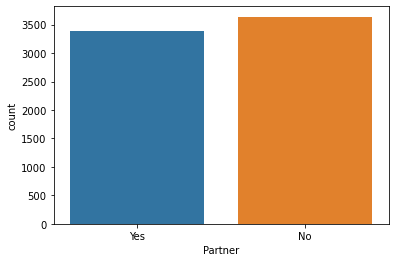

In [16]:
sns.countplot(x = 'Partner', data = customer_churn_df)
customer_churn_df['Partner'].value_counts()

- customers without the partner are slightly higher than with partner

No     4933
Yes    2099
Name: Dependents, dtype: int64

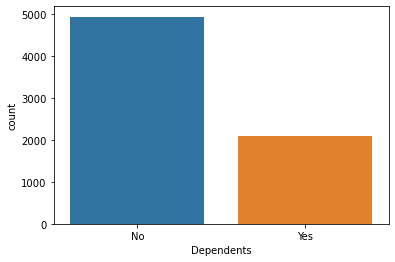

In [17]:
sns.countplot(x = 'Dependents', data = customer_churn_df)
customer_churn_df['Dependents'].value_counts()

- Customers with dependents are 2110 than without dependents who are 4933 in number

Yes    6352
No      680
Name: PhoneService, dtype: int64

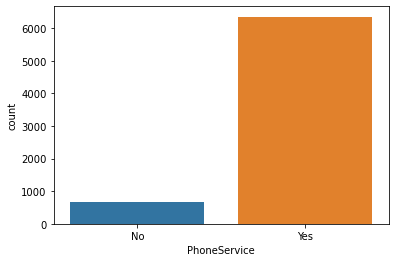

In [18]:
sns.countplot(x = 'PhoneService', data = customer_churn_df)
customer_churn_df['PhoneService'].value_counts()

- Phone service is availble for most of the customers

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

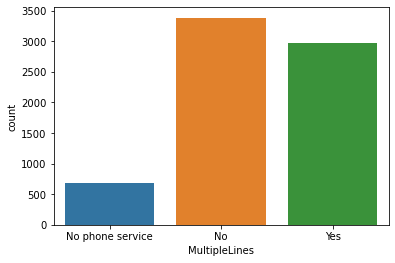

In [19]:
sns.countplot(x = 'MultipleLines', data = customer_churn_df)
customer_churn_df['MultipleLines'].value_counts()

- as we can see that no phone service count of 682 is same in 'PhoneService', 'MultipleLines' columns, we can see that these two features may be highly correlated whichwill be more clear after looking into correlation matrix.
- For those with phone service of 6361, 2971 have multiple lines 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

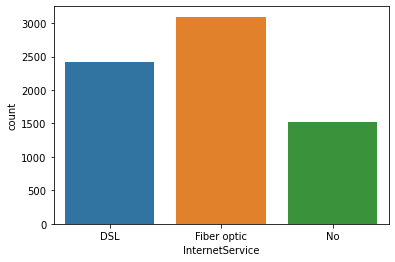

In [20]:
sns.countplot(x = 'InternetService', data = customer_churn_df)
customer_churn_df['InternetService'].value_counts()

- customers with internet facility are higher than wihout the facility 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

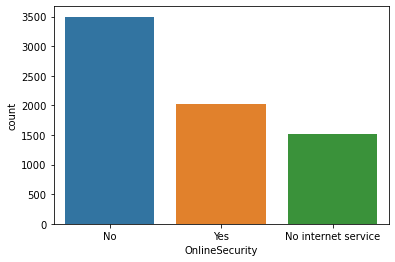

In [21]:
sns.countplot(x = 'OnlineSecurity', data = customer_churn_df)
customer_churn_df['OnlineSecurity'].value_counts()

- Those without internet facility don't have any online security
- Also, out of those who have internet services 3498 have not taken online security

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

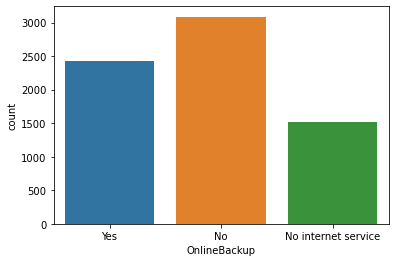

In [22]:
sns.countplot(x = 'OnlineBackup', data = customer_churn_df)
customer_churn_df['OnlineBackup'].value_counts()

- those who have internet services only 2429 have online backup

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

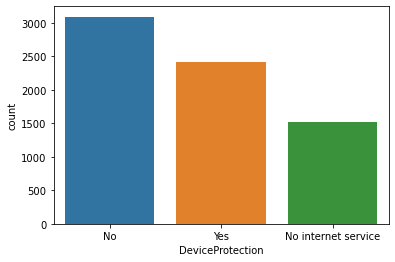

In [23]:
sns.countplot(x = 'DeviceProtection', data = customer_churn_df)
customer_churn_df['DeviceProtection'].value_counts()

- those who have internet services only 2422 have device protection

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

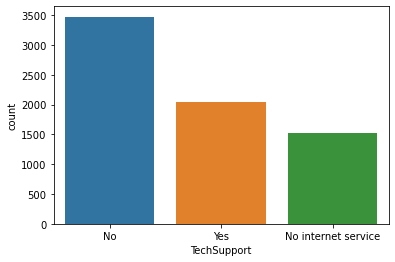

In [24]:
sns.countplot(x = 'TechSupport', data = customer_churn_df)
customer_churn_df['TechSupport'].value_counts()

- those who have internet services only 2044 have tech support

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

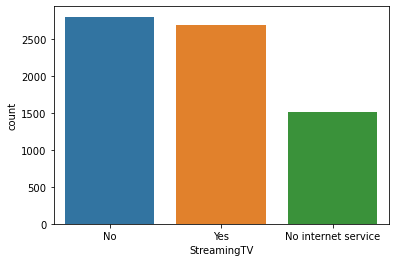

In [25]:
sns.countplot(x = 'StreamingTV', data = customer_churn_df)
customer_churn_df['StreamingTV'].value_counts()

- those who have internet services 2707 have streaming TV

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

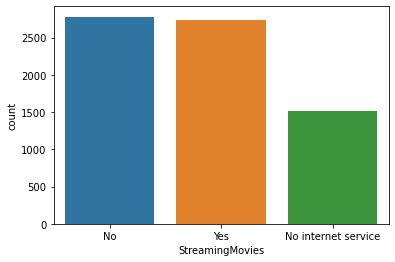

In [26]:
sns.countplot(x = 'StreamingMovies', data = customer_churn_df)
customer_churn_df['StreamingMovies'].value_counts()

- those who have internet services 2732 have streaming movies

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

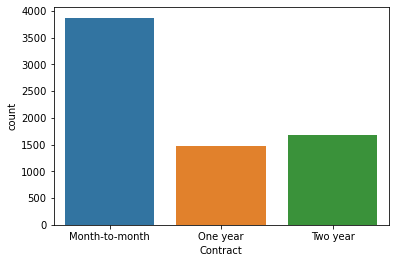

In [27]:
sns.countplot(x = 'Contract', data = customer_churn_df)
customer_churn_df['Contract'].value_counts()

- Most of the customers have taken services on monthly basis.
- Other customers either prefer 1 year contract or 2 year contract.

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

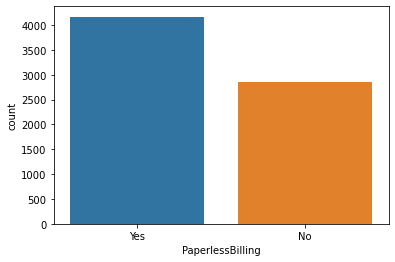

In [28]:
sns.countplot(x = 'PaperlessBilling', data = customer_churn_df)
customer_churn_df['PaperlessBilling'].value_counts()

- Most of customers prefer paperless billing.

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

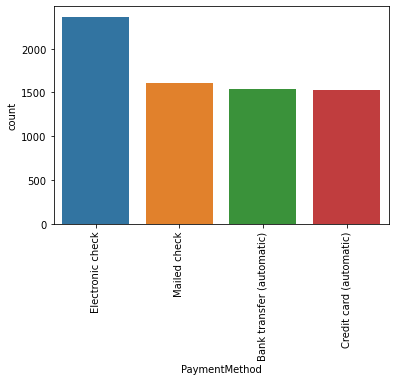

In [29]:
sns.countplot(x = 'PaymentMethod', data = customer_churn_df)
plt.xticks(rotation = 'vertical')
customer_churn_df['PaymentMethod'].value_counts()

- There are various payment methods, in which payment is most of the times made through electronic check.
- for other payment methods the count is same

No     5163
Yes    1869
Name: Churn, dtype: int64

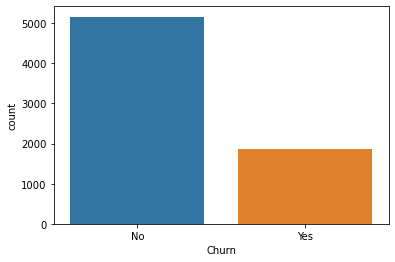

In [30]:
sns.countplot(x = 'Churn', data = customer_churn_df)
customer_churn_df['Churn'].value_counts()

- Most of the customers are not leaving. They are happy with the services provided.
- Even then too 1869 customers are leaving. We will plot few more plot to check which factors play an important role in customer leave.
- The data is imbalanced and hence needs to be balanced before model building.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

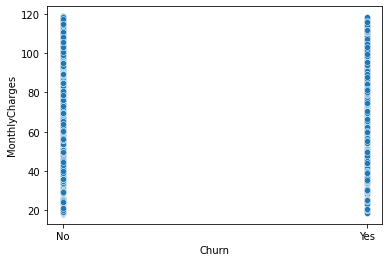

In [31]:
sns.scatterplot( x = 'Churn', y = 'MonthlyCharges', data = customer_churn_df)

In [32]:
customer_churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
for i in customer_churn_df.select_dtypes(include=['object']).columns:
    customer_churn_df[i]=le.fit_transform(customer_churn_df[i])

In [35]:
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


##### Checking for Outliers

customerID             AxesSubplot(0.125,0.787927;0.227941x0.0920732)
gender              AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
SeniorCitizen       AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
Partner                AxesSubplot(0.125,0.677439;0.227941x0.0920732)
Dependents          AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
tenure              AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
PhoneService           AxesSubplot(0.125,0.566951;0.227941x0.0920732)
MultipleLines       AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
InternetService     AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
OnlineSecurity         AxesSubplot(0.125,0.456463;0.227941x0.0920732)
OnlineBackup        AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
DeviceProtection    AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
TechSupport            AxesSubplot(0.125,0.345976;0.227941x0.0920732)
StreamingTV         AxesSubplot(0.398529,0.345976;0.227941x0.0920732)
StreamingMovies     

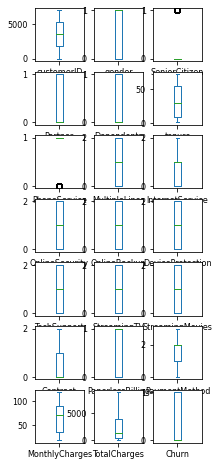

In [36]:
customer_churn_df.plot(kind='box', subplots = True, layout = (7,3), figsize = (3,8), fontsize = 8)

In [37]:
from scipy.stats import zscore
z = np.abs(zscore(customer_churn_df))
z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911100,1.009430,0.440327,1.035617,0.652305,1.280248,3.056334,0.062666,1.183614,0.917837,1.242875,1.026988,0.924267,1.112632,1.121501,0.826735,0.828939,0.399805,1.161694,0.994194,0.601663
1,0.215521,0.990658,0.440327,0.965608,0.652305,0.064303,0.327189,0.991564,1.183614,1.408012,1.028998,1.245441,0.924267,1.112632,1.121501,0.373926,1.206361,1.336636,0.260878,0.173740,0.601663
2,0.471683,0.990658,0.440327,0.965608,0.652305,1.239504,0.327189,0.991564,1.183614,1.408012,1.242875,1.026988,0.924267,1.112632,1.121501,0.826735,0.828939,1.336636,0.363923,0.959649,1.662059
3,0.989427,0.990658,0.440327,0.965608,0.652305,0.512486,3.056334,0.062666,1.183614,1.408012,1.028998,1.245441,1.396963,1.112632,1.121501,0.373926,1.206361,1.473857,0.747850,0.195248,0.601663
4,1.470223,1.009430,0.440327,0.965608,0.652305,1.239504,0.327189,0.991564,0.172835,0.917837,1.028998,1.026988,0.924267,1.112632,1.121501,0.826735,0.828939,0.399805,0.196178,0.940457,1.662059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.653953,0.990658,0.440327,1.035617,1.533025,0.343137,0.327189,1.116896,1.183614,1.408012,1.028998,1.245441,1.396963,1.146689,1.137564,0.373926,0.828939,1.336636,0.664868,0.129180,0.601663
7039,0.981052,1.009430,0.440327,1.035617,1.533025,1.612573,0.327189,1.116896,0.172835,0.917837,1.242875,1.245441,0.924267,1.146689,1.137564,0.373926,0.828939,0.537026,1.276493,2.241056,0.601663
7040,0.077588,1.009430,0.440327,1.035617,1.533025,0.872808,3.056334,0.062666,1.183614,1.408012,1.028998,1.026988,0.924267,1.112632,1.121501,0.826735,0.828939,0.399805,1.170004,0.854514,0.601663
7041,1.185982,0.990658,2.271039,1.035617,0.652305,1.158016,0.327189,1.116896,0.172835,0.917837,1.028998,1.026988,0.924267,1.112632,1.121501,0.826735,0.828939,1.336636,0.319168,0.872095,1.662059


In [38]:
# List of array containing z-score greater than 3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
         568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
         687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
         841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
         938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
        1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
        1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
        1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
        1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
        1629, 1632, 1647, 1684, 1687, 

In [39]:
# Removing the rows with z score greater than 3
customer_churn_df_new = customer_churn_df[(z<3).all(axis=1)]
customer_churn_df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,6500,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,6540,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1001,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1756,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,4843,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1524,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7041,5923,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [40]:
# Checking the shape of the dataset before and after removing outliers
print("Old DataFrame:-", customer_churn_df.shape)
print("New DataFrame:-", customer_churn_df_new.shape)
print('Total dropped rows:-', customer_churn_df.shape[0]-customer_churn_df_new.shape[0])

Old DataFrame:- (7032, 21)
New DataFrame:- (6352, 21)
Total dropped rows:- 680


In [41]:
# Percentage loss of data
loss_percent = (7032 - 6352)/6352*100
print(loss_percent,'%')

10.70528967254408 %


- After removing outliers more than 10% of data will be lost. Hence we will take the data without removing the outliers

##### Correlation

In [42]:
customer_churn_df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,0.007209,-0.006987,0.004497,-0.012335,0.013740,-0.002960,-0.006726,0.001763,-0.007650,-0.017207,0.015949,-0.002225,0.011754,-0.004445,-0.000263,-0.017858
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.007209,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,0.004497,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.012335,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,0.013740,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050


<AxesSubplot:>

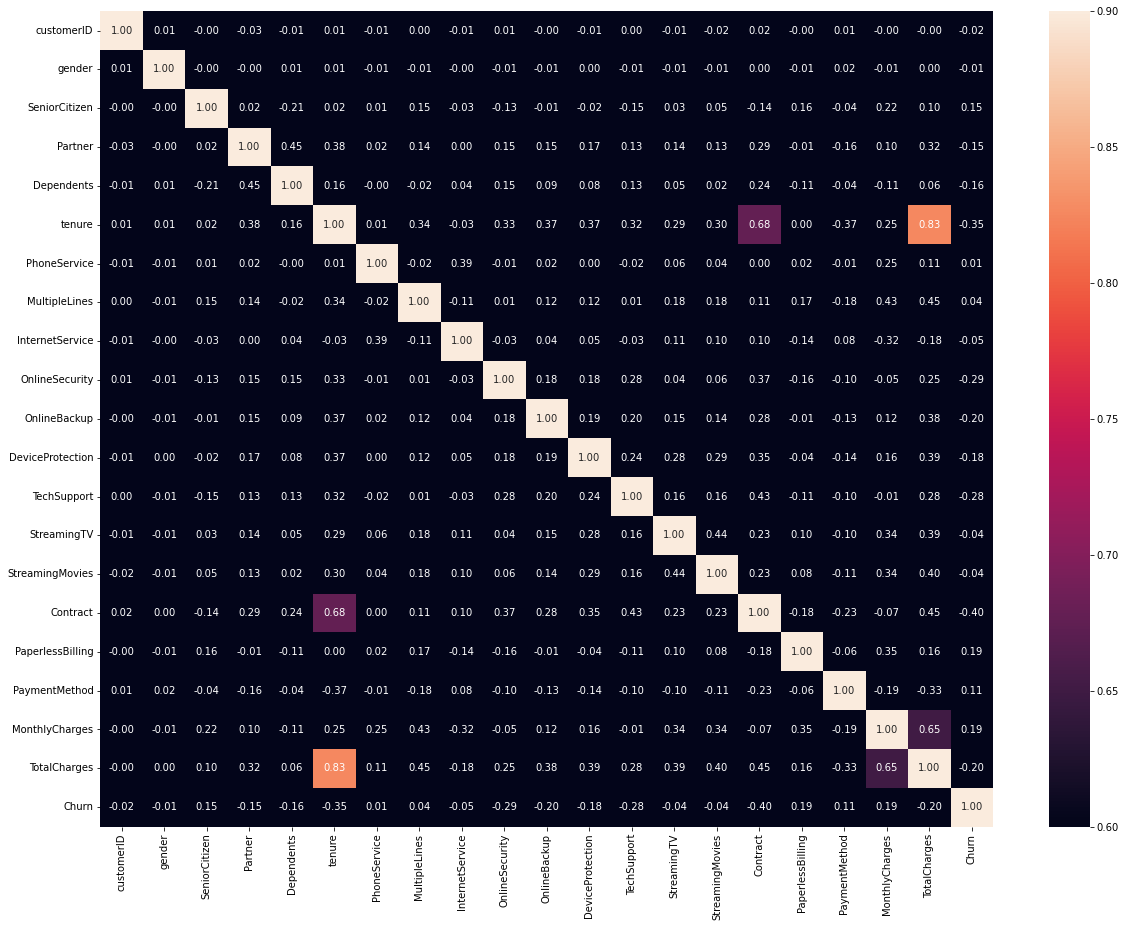

In [43]:
plt.figure(figsize = (20,15))
sns.heatmap(customer_churn_df.corr(), annot = True, fmt ="0.2f", vmin = 0.6, vmax = 0.9)

- There is a good relation of features with 'churn'

##### Splitting the data into X and Y

In [44]:
X = customer_churn_df.iloc[:,:-1]
y = customer_churn_df.iloc[:,-1]

In [45]:
X.shape, y.shape

((7032, 20), (7032,))

##### Checking for skewness

In [46]:
X.skew()

customerID          0.000000
gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
dtype: float64

In [47]:
# Lets remove the skewness using transformation with threshold 0.5
for index in X.skew().index:
    if X.skew().loc[index]>0.5:
        X[index]=np.log1p(X[index])
    if X.skew().loc[index]<-0.5:
        X[index]=np.square(X[index])

In [48]:
X.skew()

customerID          0.000000
gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.437983
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges       -0.352539
dtype: float64

##### Checking for variance inflation factor

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif = pd.DataFrame()
    vif['VIF_Factor']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['features names']=X.columns
    print(vif)

In [50]:
vif_calc()

    VIF_Factor    features names
0     3.645313        customerID
1     1.953645            gender
2     1.369512     SeniorCitizen
3     2.826363           Partner
4     1.958999        Dependents
5    22.292344            tenure
6    14.978096      PhoneService
7     2.770165     MultipleLines
8     4.346939   InternetService
9     2.277287    OnlineSecurity
10    2.438831      OnlineBackup
11    2.632716  DeviceProtection
12    2.400681       TechSupport
13    3.231414       StreamingTV
14    3.263331   StreamingMovies
15    4.440383          Contract
16    2.854773  PaperlessBilling
17    3.119714     PaymentMethod
18   23.473721    MonthlyCharges
19   64.279363      TotalCharges


##### Scaling the data using MinMaxScaler

In [51]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)
X

array([[0.76304935, 0.        , 0.        , ..., 0.66666667, 0.11542289,
        0.03878731],
       [0.56222443, 1.        , 0.        , ..., 1.        , 0.38507463,
        0.65457177],
       [0.36381738, 1.        , 0.        , ..., 1.        , 0.35422886,
        0.17871909],
       ...,
       [0.4775992 , 0.        , 0.        , ..., 0.66666667, 0.11293532,
        0.34517703],
       [0.84241217, 1.        , 1.        , ..., 1.        , 0.55870647,
        0.32594331],
       [0.31588679, 1.        , 0.        , ..., 0.        , 0.86965174,
        0.94188558]])

### Model Building

##### SMOTE for imbalance

In [52]:
# Before proceeding with model building we need to apply SMOTE since the data is imbalanced
from imblearn.over_sampling import SMOTE
smt_churn = SMOTE()
train_x, train_y = smt_churn.fit_resample(X,y)

In [53]:
train_y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [54]:
# Importing the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

model = [lg, gnb, svc, dtc, knn, rfc]

In [56]:
# Maximum accuracy
maxAccu = 0 

# Best random state value for which accuracy is achieved 
maxRS = 0
for m in model:
    for i in range(0,40):
        x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.2, random_state=i)
        m.fit(x_train, y_train)
        train_score = m.score(x_train, y_train)
        test_score = m.score(x_train, y_train)
        pred = m.predict(x_test)
        print(f'----------------At random State {i} ------------------')
        acc = accuracy_score(y_test, pred)
        print("Accuracy score of ", m, 'is:', acc)
        print(f'Training score of {m} is {train_score}')
        print(f'Testing score of {m} is {test_score}')
        print('\n')
    
        if acc > maxAccu:
            maxAccu = acc
            maxRS = i
            print(f"Maximum accuracy score of {m} is {acc} at Random state {i}")
            print('\n')
    print('*'*120)
    

----------------At random State 0 ------------------
Accuracy score of  LogisticRegression() is: 0.8025169409486931
Training score of LogisticRegression() is 0.7766343825665859
Testing score of LogisticRegression() is 0.7766343825665859


Maximum accuracy score of LogisticRegression() is 0.8025169409486931 at Random state 0


----------------At random State 1 ------------------
Accuracy score of  LogisticRegression() is: 0.78702807357212
Training score of LogisticRegression() is 0.7806295399515738
Testing score of LogisticRegression() is 0.7806295399515738


----------------At random State 2 ------------------
Accuracy score of  LogisticRegression() is: 0.7836398838334947
Training score of LogisticRegression() is 0.7812348668280872
Testing score of LogisticRegression() is 0.7812348668280872


----------------At random State 3 ------------------
Accuracy score of  LogisticRegression() is: 0.78702807357212
Training score of LogisticRegression() is 0.7771186440677966
Testing score of Logi

- Maximum accuracy score of RandomForestClassifier() is 0.8746369796708615 at Random state 0

##### Cross validation of all the Algorithms

In [57]:
# Before proceeding with the hpyer parameter tunning we will check for cross validation
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for m in model:
    print(f'---------------------- Cross Validation of {m} --------------------------')
    for j in range(2,15):
        cv_score = cross_val_score(m, train_x,train_y,cv=j)
        cv_mean = cv_score.mean()
        print(f"At cross fold {j} the cv score is {cv_mean}")
        print('\n') 
    
        if cv_mean > max_cvscore:
            max_cvscore=cv_mean
            max_cv = j
            print(f"At cross fold {j} the Maximum CV score is {max_cvscore}")
            print('\n') 
    print('*'*120)
    print('\n')

---------------------- Cross Validation of LogisticRegression() --------------------------
At cross fold 2 the cv score is 0.7785202401704435


At cross fold 2 the Maximum CV score is 0.7785202401704435


At cross fold 3 the cv score is 0.7808444702692232


At cross fold 3 the Maximum CV score is 0.7808444702692232


At cross fold 4 the cv score is 0.7798772895295448


At cross fold 5 the cv score is 0.7803612037625196


At cross fold 6 the cv score is 0.7802634127445284


At cross fold 7 the cv score is 0.7794892944086825


At cross fold 8 the cv score is 0.7799775878322796


At cross fold 9 the cv score is 0.7796871840931636


At cross fold 10 the cv score is 0.779978443909138


At cross fold 11 the cv score is 0.7802694341247581


At cross fold 12 the cv score is 0.7802672212768639


At cross fold 13 the cv score is 0.7801722887792941


At cross fold 14 the cv score is 0.7799808895549702


**********************************************************************************************

- At cross fold 13 the Maximum CV score is 0.8622227177951717 for Random Forest

In [58]:
# Training each algorithm for Random state 0
for m in model:
    x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.2, random_state=0)
    m.fit(x_train, y_train)
    train_score = m.score(x_train, y_train)
    test_score = m.score(x_train, y_train)
    pred = m.predict(x_test)
    print(f'--------------------- {m} ----------------------')
    acc_hr = accuracy_score(y_test, pred)
    print("Accuracy score of ", m, 'is:', acc)
    print(f'Training score of {m} is {train_score}')
    print(f'Testing score of {m} is {test_score}')
    print("Confusion Matrix:\n",confusion_matrix(y_test, pred))
    print('Classification Report:\n',classification_report(y_test, pred))
    print('*'*120,'\n')

--------------------- LogisticRegression() ----------------------
Accuracy score of  LogisticRegression() is: 0.8581800580832527
Training score of LogisticRegression() is 0.7766343825665859
Testing score of LogisticRegression() is 0.7766343825665859
Confusion Matrix:
 [[772 234]
 [174 886]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1006
           1       0.79      0.84      0.81      1060

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

************************************************************************************************************************ 

--------------------- GaussianNB() ----------------------
Accuracy score of  GaussianNB() is: 0.8581800580832527
Training score of GaussianNB() is 0.7628329297820823
Testing score of GaussianNB() is 0.7628329297820823
Confusion Matrix

##### Hyper Parameter Tunning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_rfc = {'n_estimators': [100,200],'max_features': ['auto', 'sqrt'],
             'max_depth': [10, 20],
             'min_samples_split': [6, 10],'min_samples_leaf': [1, 3]}

gcv_rfc = GridSearchCV(rfc,param_rfc,cv=13,scoring= 'accuracy')

# training
gcv_rfc.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_rfc.best_params_)

print("Best Estimator:",gcv_rfc.best_estimator_)

gcv_rfc_pred=gcv_rfc.best_estimator_.predict(x_test)

print('Final Accuracy with Random Forest Classifier:', accuracy_score(y_test,gcv_rfc_pred))

Best parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(max_depth=20, max_features='auto', min_samples_split=6,
                       n_estimators=200)
Final Accuracy with Random Forest Classifier: 0.8678606001936109


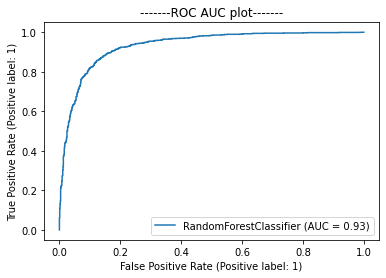

In [61]:
# ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv_rfc.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

### Pickling

In [62]:
# Pickling of the file or serialization of a file
# Random Forest Classifier
import joblib
joblib.dump(gcv_rfc.best_estimator_,"Churn_RFC.pkl")

['Churn_RFC.pkl']

In [63]:
churn_model_rfc = joblib.load('Churn_RFC.pkl')
churn_result_rfc = churn_model_rfc.score(x_test, y_test)
print(churn_result_rfc*100)

86.78606001936109


In [64]:
churn_conclusion = pd.DataFrame([churn_model_rfc.predict(x_test),y_test], index=['Predicted churn', 'Original churn'])
churn_conclusion.T

,Predicted churn,Original churn
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
2061,1,0
2062,1,1
2063,1,1
2064,0,0


In [65]:
churn_conclusion.T[['Predicted churn', 'Original churn']].value_counts()

Predicted churn  Original churn
1                1                 932
0                0                 861
1                0                 145
0                1                 128
dtype: int64

###### We can see that model is predicting well 
###### Out of 296 test data model is predicting accurately on 932+861 = 1793 occasions and wrong on 145+128 = 283 occasions

#### Thank you